<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
from itertools import combinations
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
df = pd.read_csv(breast_cancer_csv)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

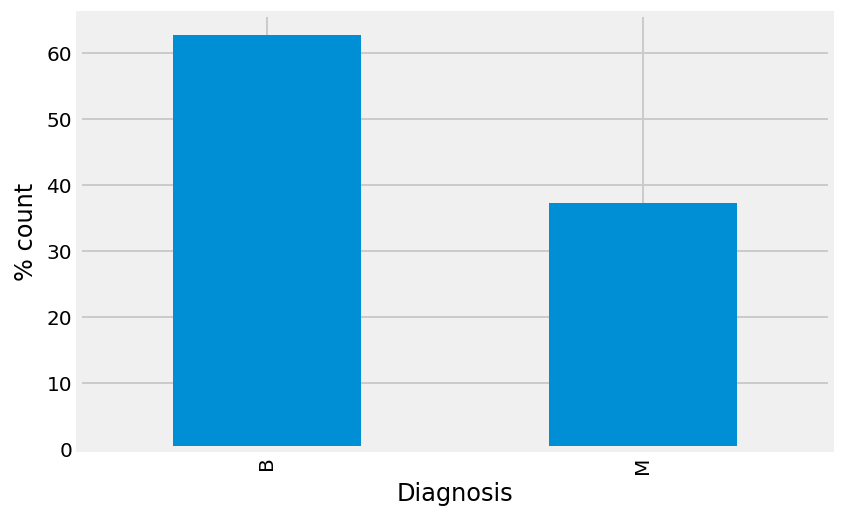

In [9]:
(df['diagnosis'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.ylabel('% count')
plt.xlabel('Diagnosis')
plt.show()

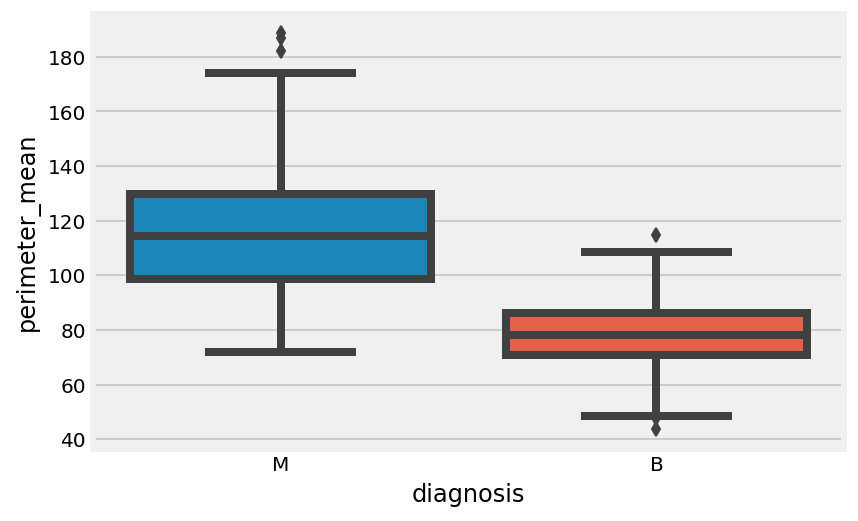

In [10]:
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.show()

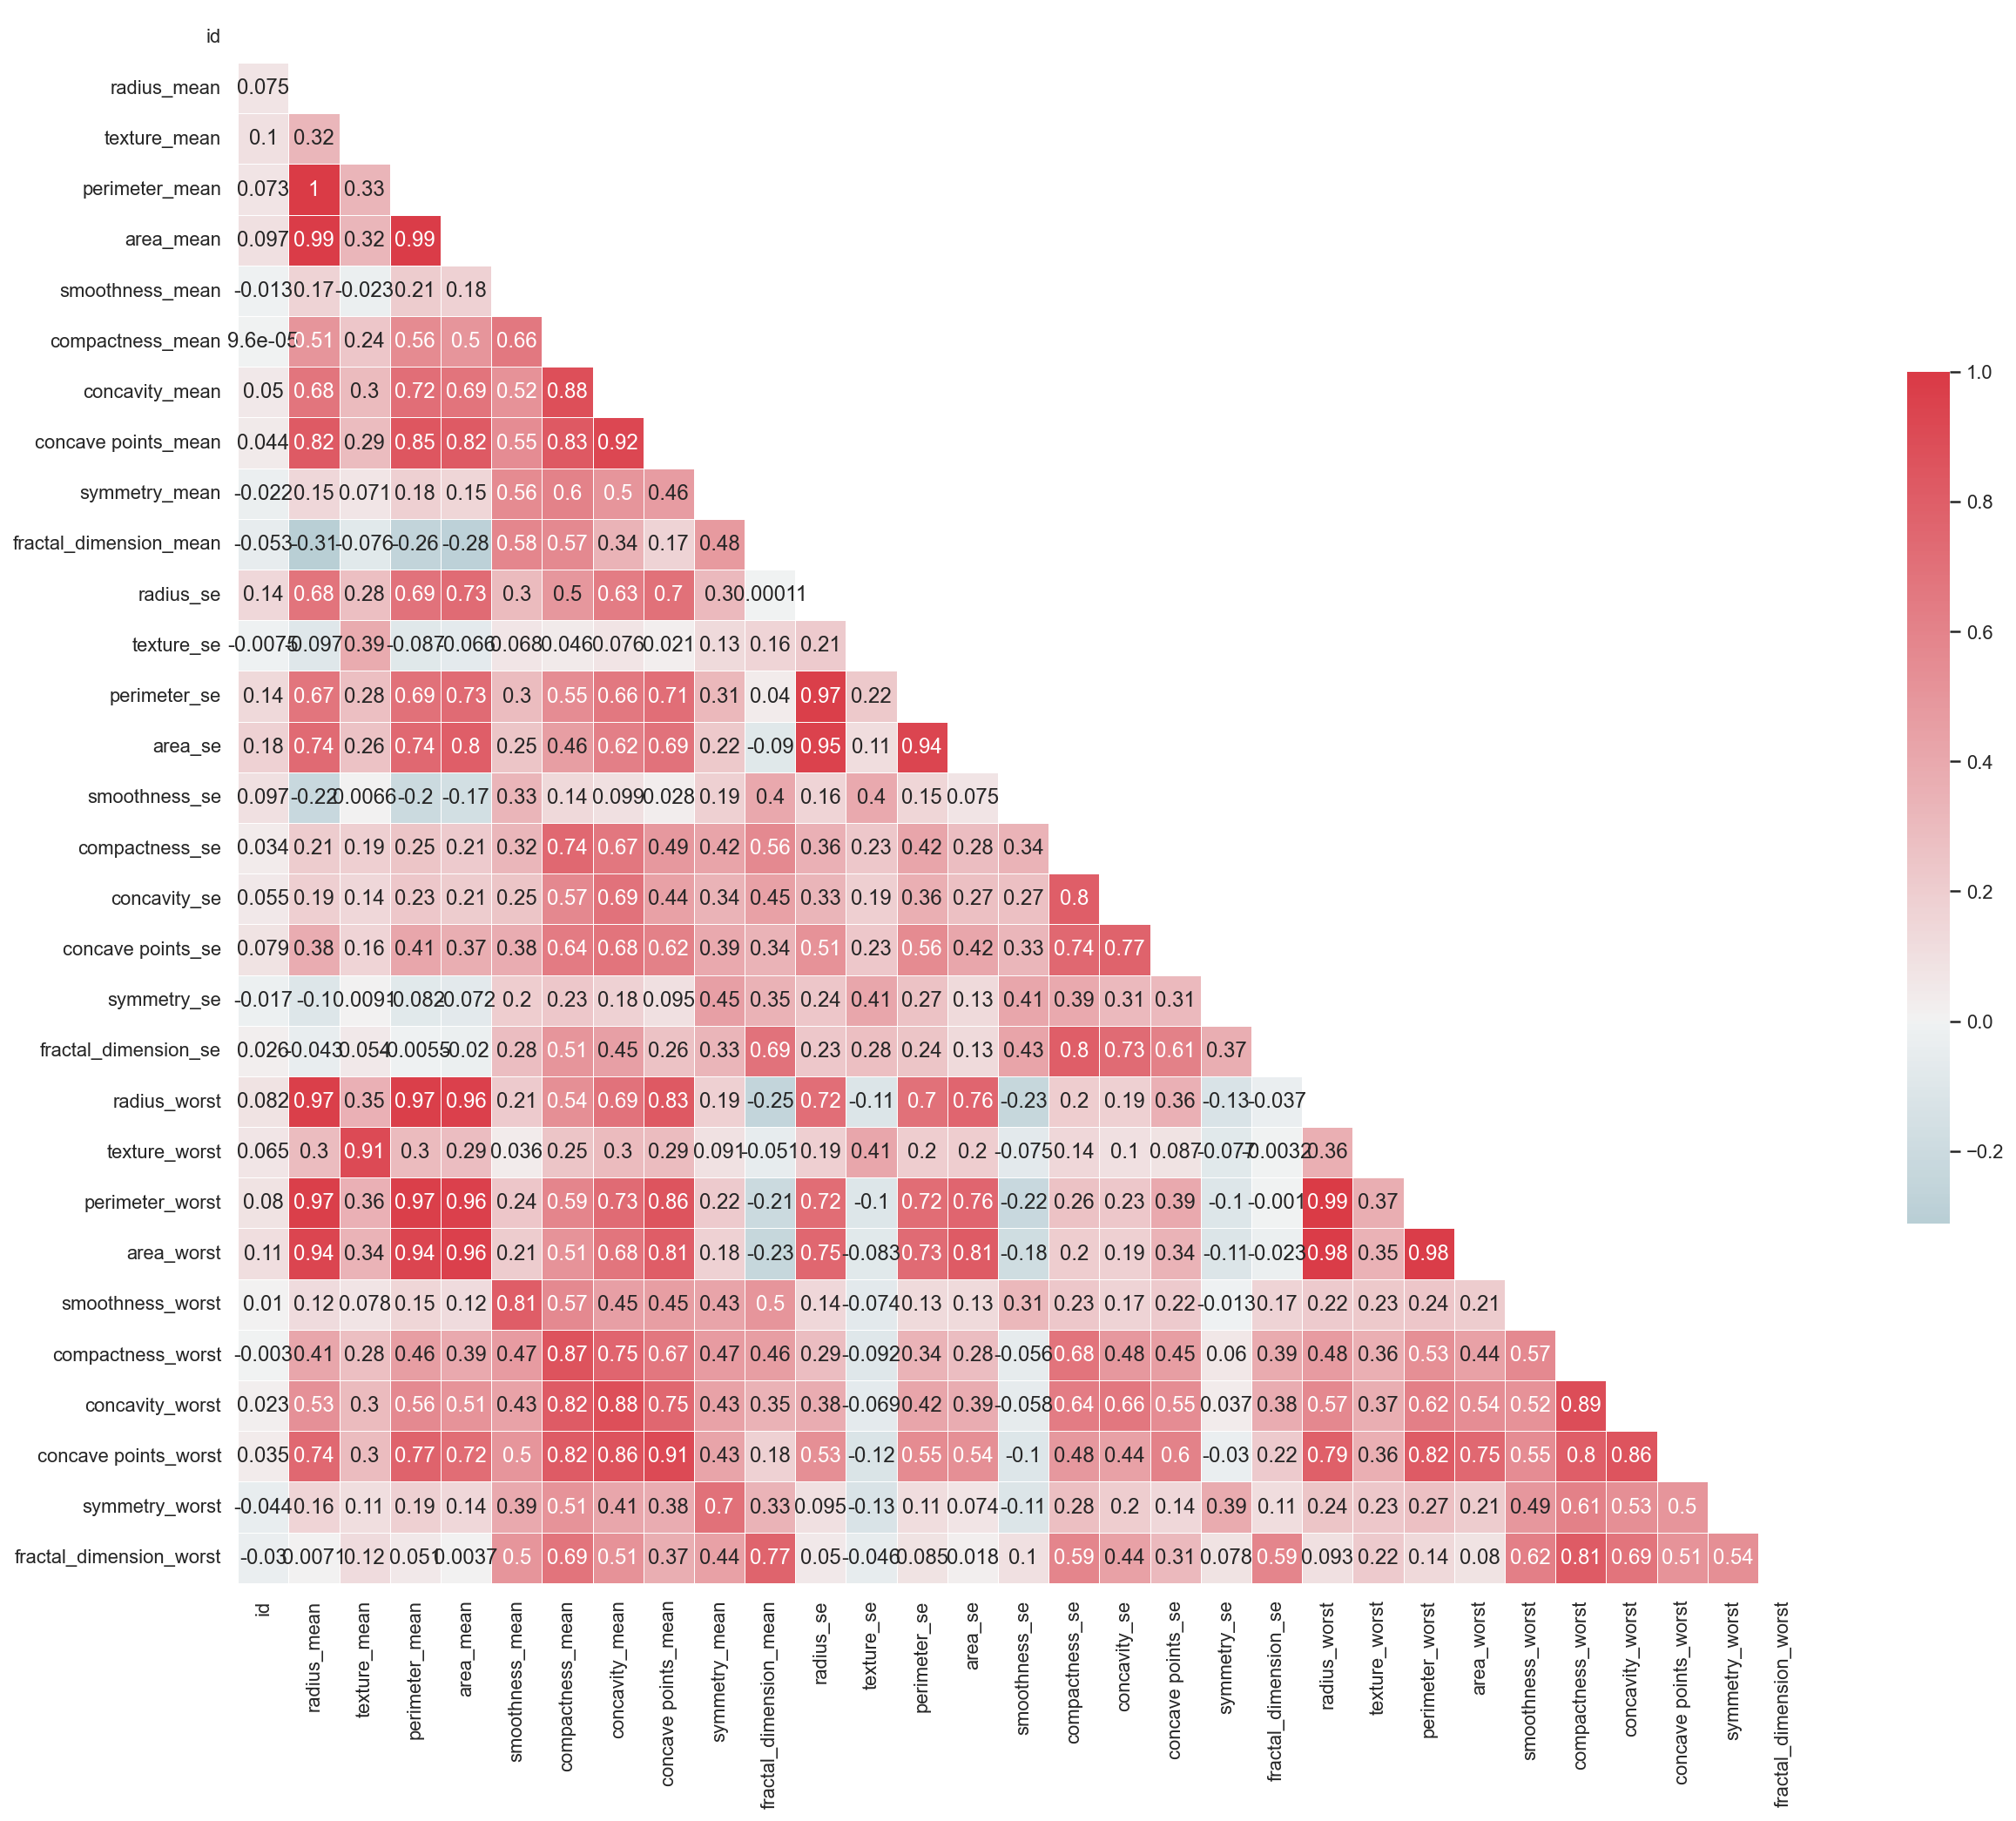

In [12]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [13]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
# Get columns of that have 'mean' or 'diagnosis' in their names

mean_only_columns = []

for column in df.columns:
    if '_mean' in column or 'diagnosis' in column:
        mean_only_columns.append(column)
        
# List comprehension version: 
# mean_only_columns = [c for c in breast_cancer.columns if not '_worst' in c and not '_se' in c]

print(mean_only_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [17]:
# Select mean_only_columns in breast cancer dataframe

selected_df = df[mean_only_columns]
selected_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [19]:
# Create a custom function that plots correlation in heatmap

def plot_corr_heatmap(df):

    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 18))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

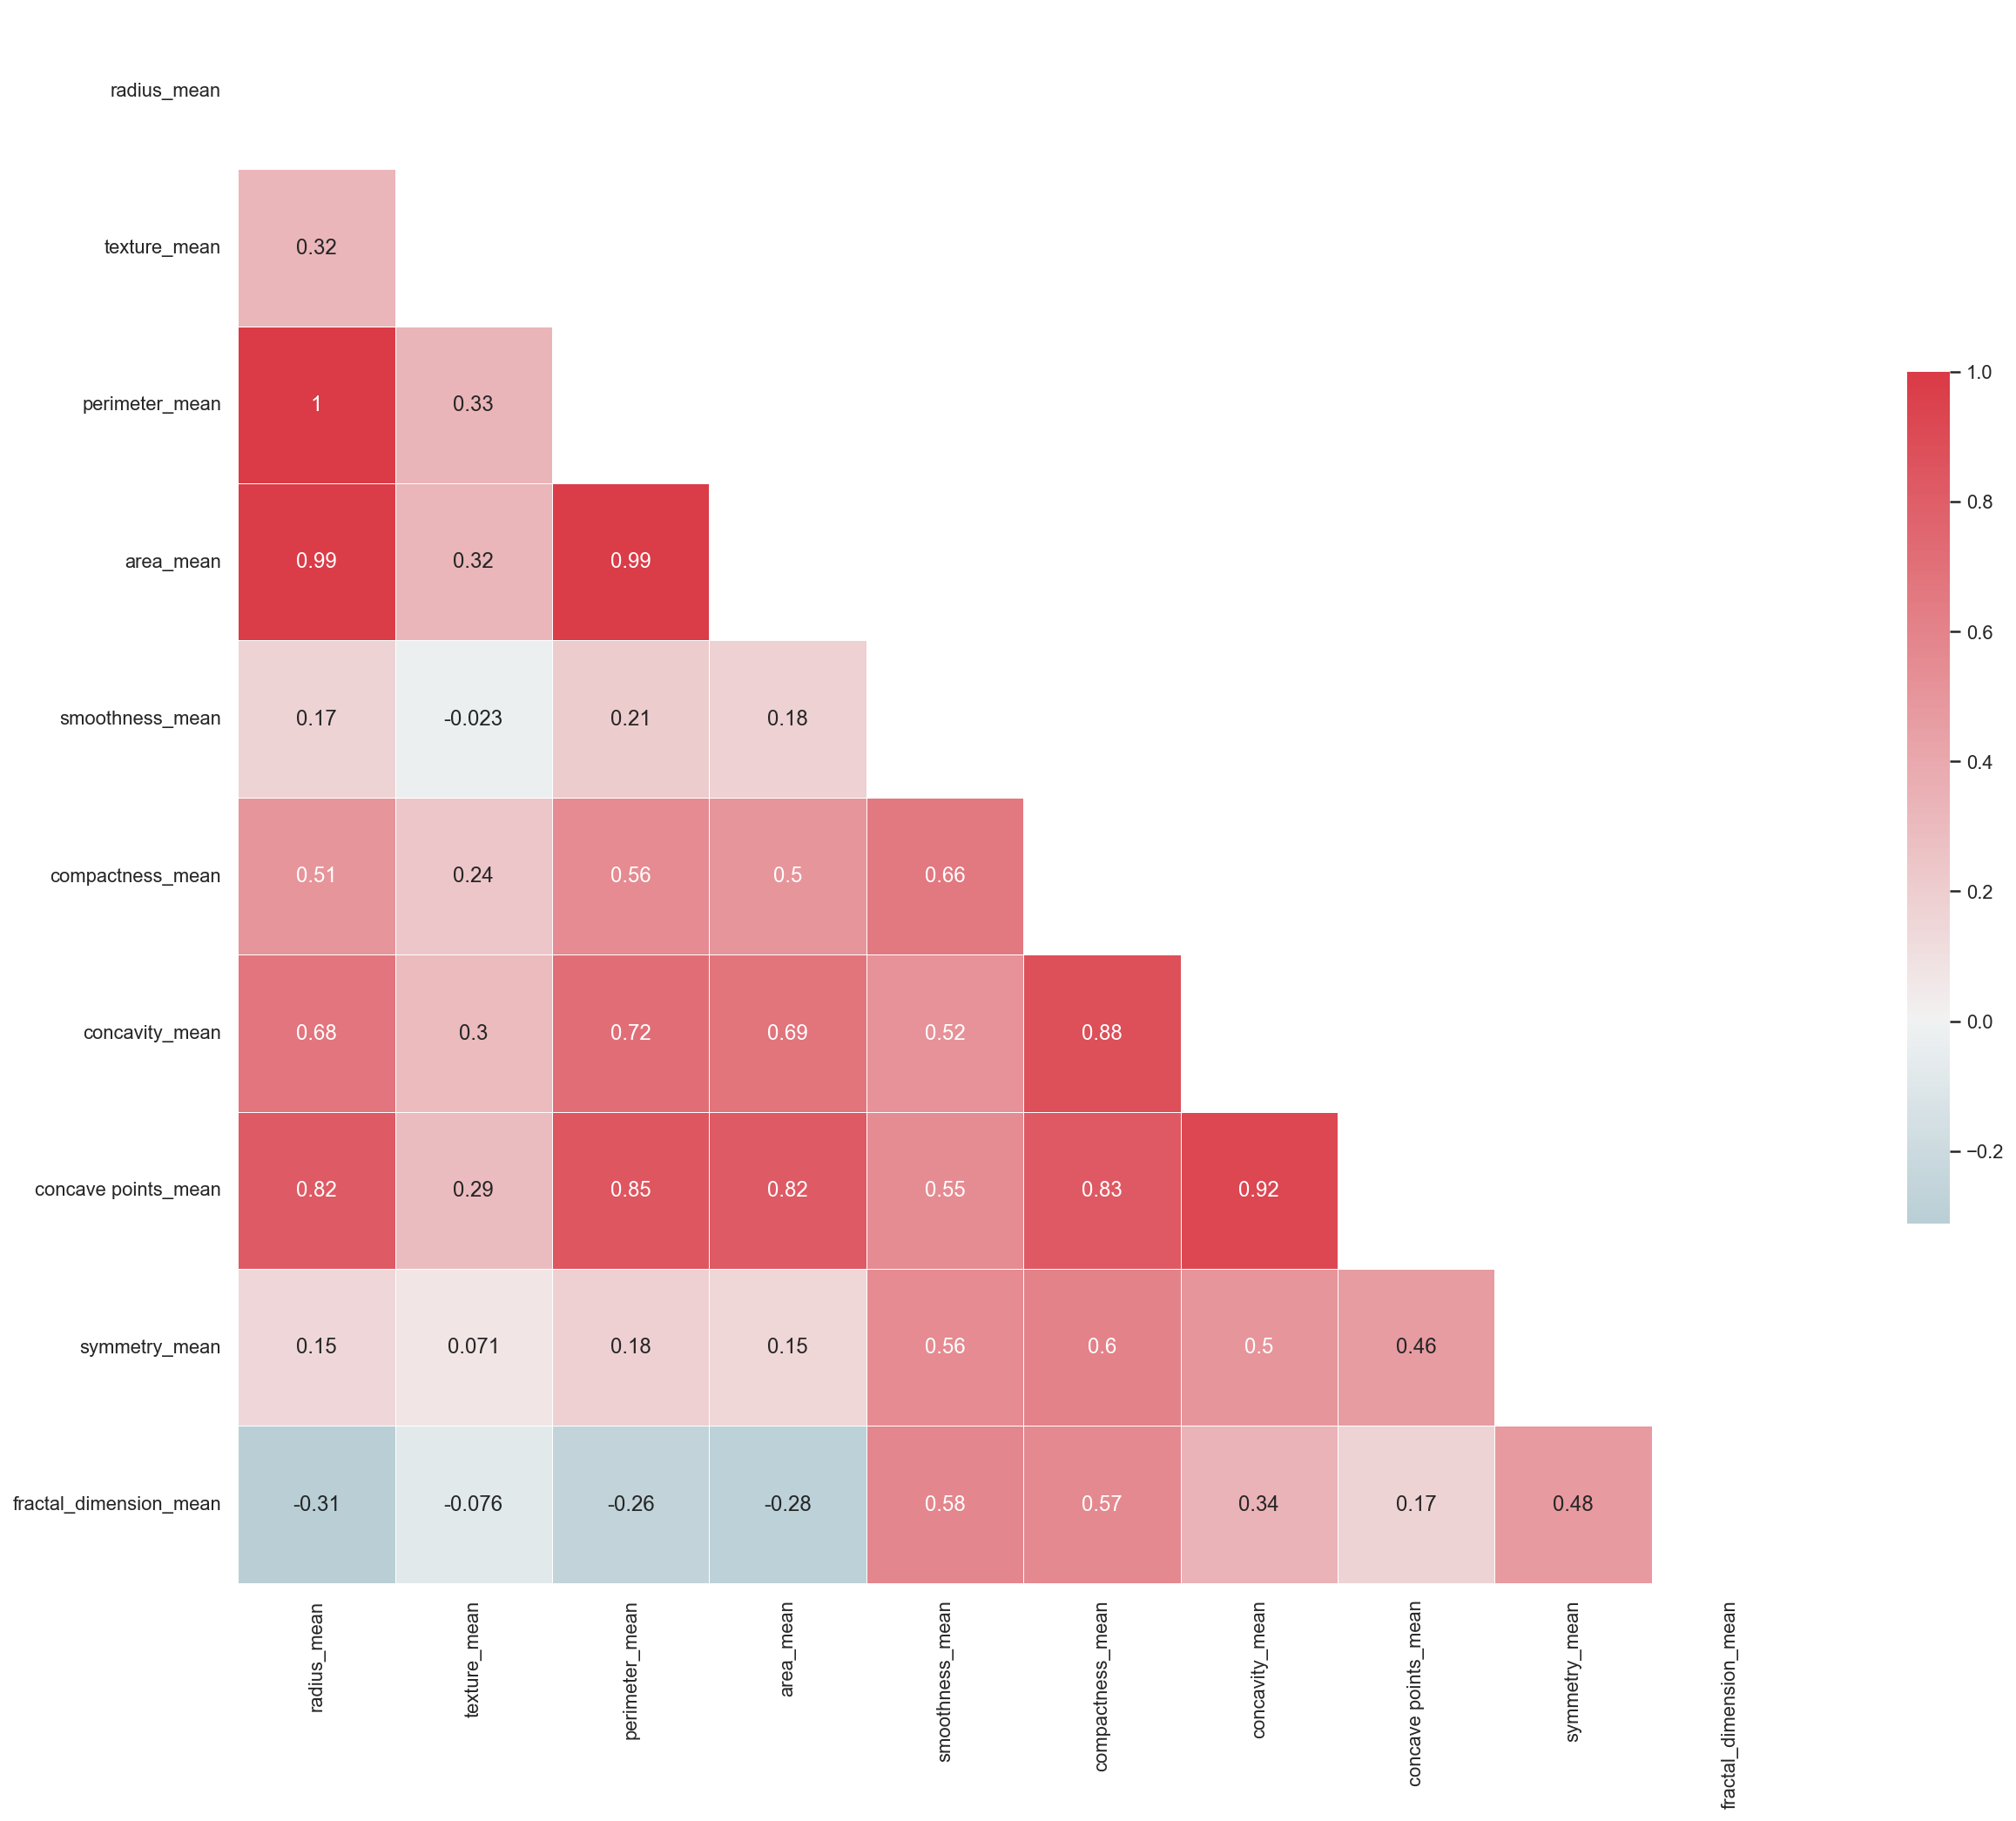

In [21]:
# Plot correlations in selected_breast_cancer

plot_corr_heatmap(selected_df)

Feature 1 Feature 2 Correlation Value perimeter_mean area_mean 0.99 area_mean perimeter_mean 0.99

In [25]:
def find_feature_correlations(data):
    
    """
    Find correlations between df features and convert to a format 
    with one feature1 vs. feature2 correlation value per row 
    
    _Params:_
    
    df: pandas DataFrame, features as columns. All datatypes must be numeric
    
    Returns a pandas DataFrame where a row contains one feature1 vs. feature2 correlation value
    """
    
    # initalise variable lists 
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []
    
    # iterate over generator for tuples of feature combination pairs
    for comb in combinations(data.columns.tolist(), 2):
        
        v1 = comb[0] 
        var1.append(v1) # save feature 1 to list 

        v2 = comb[1]
        var2.append(v2) # save feature 2 to list
        
        p, p_value = stats.pearsonr(df[v1], df[v2]) # get pearson correlation
        pearsons.append(p)
        pvalues.append(p_value)
    
    # Build dataframe of feature1 vs. feature2 pearson correlation
    corr_data = pd.DataFrame({'Feature1': var1,
                            'Feature2': var2,
                            'P': pearsons,
                            'p-value': pvalues})
    
    return corr_data

In [26]:
list(combinations(selected_df.columns.tolist(), 2))

[('diagnosis', 'radius_mean'),
 ('diagnosis', 'texture_mean'),
 ('diagnosis', 'perimeter_mean'),
 ('diagnosis', 'area_mean'),
 ('diagnosis', 'smoothness_mean'),
 ('diagnosis', 'compactness_mean'),
 ('diagnosis', 'concavity_mean'),
 ('diagnosis', 'concave points_mean'),
 ('diagnosis', 'symmetry_mean'),
 ('diagnosis', 'fractal_dimension_mean'),
 ('radius_mean', 'texture_mean'),
 ('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'smoothness_mean'),
 ('radius_mean', 'compactness_mean'),
 ('radius_mean', 'concavity_mean'),
 ('radius_mean', 'concave points_mean'),
 ('radius_mean', 'symmetry_mean'),
 ('radius_mean', 'fractal_dimension_mean'),
 ('texture_mean', 'perimeter_mean'),
 ('texture_mean', 'area_mean'),
 ('texture_mean', 'smoothness_mean'),
 ('texture_mean', 'compactness_mean'),
 ('texture_mean', 'concavity_mean'),
 ('texture_mean', 'concave points_mean'),
 ('texture_mean', 'symmetry_mean'),
 ('texture_mean', 'fractal_dimension_mean'),
 ('perimeter_mean

In [27]:
# Use custom function to calculate correlations
cancer_corr = find_feature_correlations(selected_df.select_dtypes(np.number))

# Sort rows by descending values of P 
cancer_corr[cancer_corr['P'] > 0.7]

,Feature1,Feature2,P,p-value
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
6,radius_mean,concave points_mean,0.822529,4.350747e-141
17,perimeter_mean,area_mean,0.986507,0.000000e+00
20,perimeter_mean,concavity_mean,0.716136,1.322967e-90
21,perimeter_mean,concave points_mean,0.850977,1.047656e-160
27,area_mean,concave points_mean,0.823269,1.491019e-141
35,compactness_mean,concavity_mean,0.883121,1.623002e-188
36,compactness_mean,concave points_mean,0.831135,1.240590e-146
39,concavity_mean,concave points_mean,0.921391,6.788791e-235


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [28]:
y = selected_df['diagnosis']

### 4. What is the baseline accuracy?

In [29]:
y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [32]:
feature_columns = []
excluded_columns = ['diagnosis', 'area_mean', 'radius_mean', 'concavity_mean', 'compact_points_mean']

for column in selected_df.columns:
    if column not in excluded_columns:
        feature_columns.append(column)

# list comprehension version:
# feature_columns = [c for c in selected_breast_cancer.columns if c not in excluded_columns]

# Filter for the feature columns
X = selected_df[feature_columns]
X.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [34]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [35]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9385964912280702


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [36]:
# Find rows in X_train
k = X_train.shape[0]

# Fit new KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

# What is the accuracy when k = number of rows?
print(metrics.accuracy_score(y_test, y_pred_class))

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [37]:
list(range(1, X_train.shape[0]+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [38]:
# Get accuracy of models with increasing number of neighbors
test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

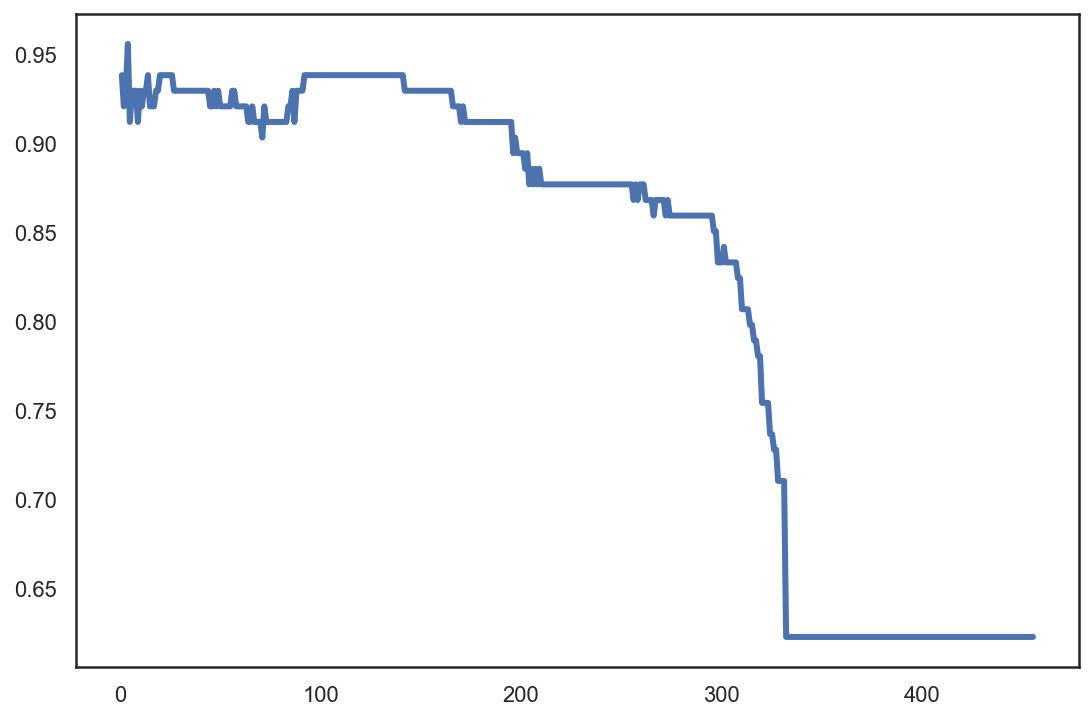

In [39]:
# plot test accuracy by number of neighbors:  

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [41]:
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# calculate test accuracy for model fitted with increasing number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))
    
print(max(test_acc))

455.0
0.9068622884645242


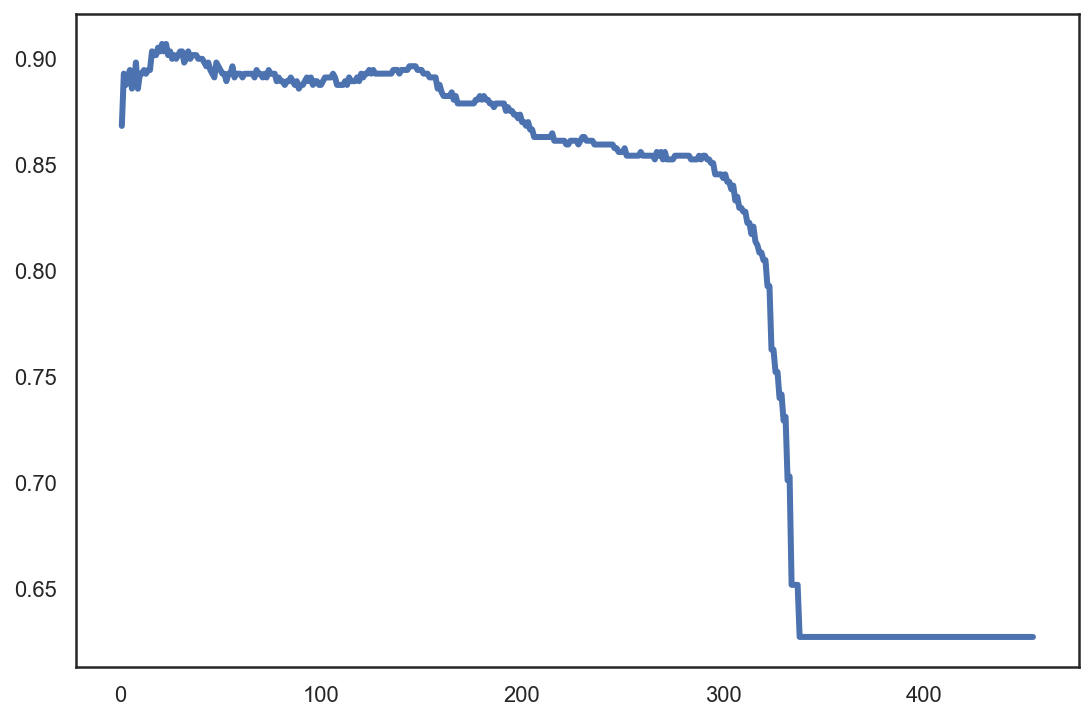

In [42]:
# Plot the accuracy vs. neighbours in KNN model

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [44]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

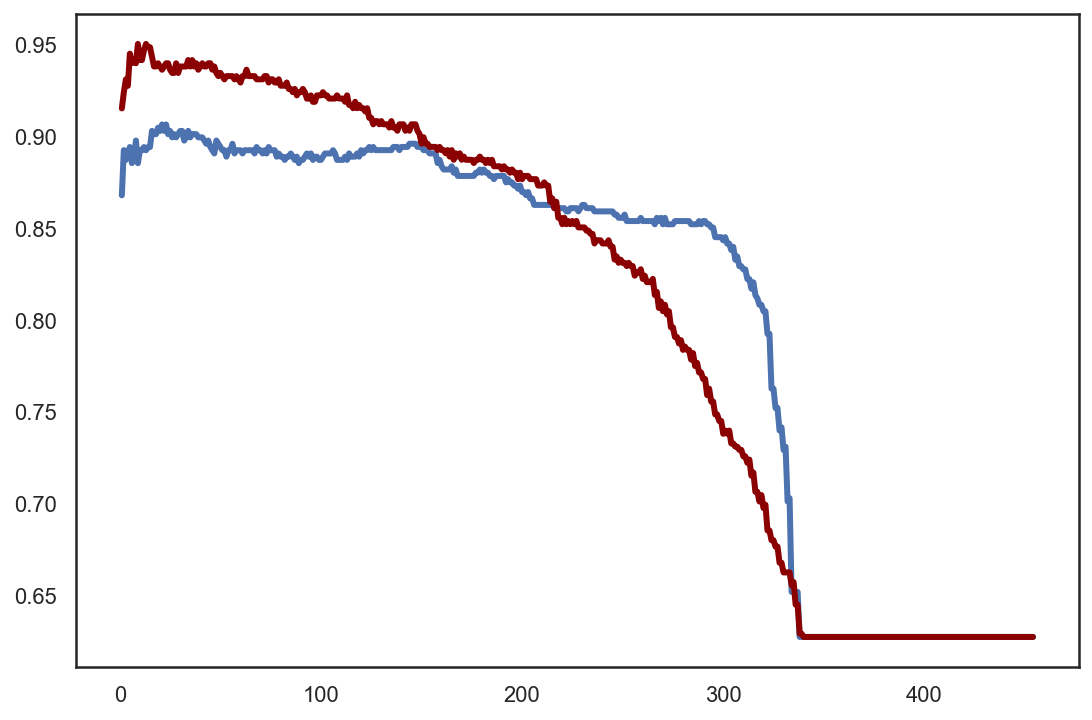

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



